## Probability to Statistics

## Why use statistics ,what can go wrong if you dont

### Suppose our train set is too noisy, it always is.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
X1 = np.random.randn(1000)

In [13]:
e = 25*np.random.randn(1000)

In [14]:
Y = 5 + X1 + e

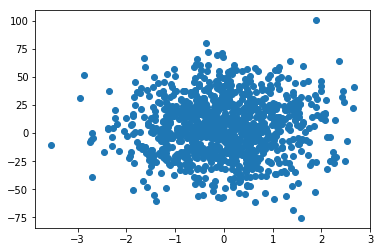

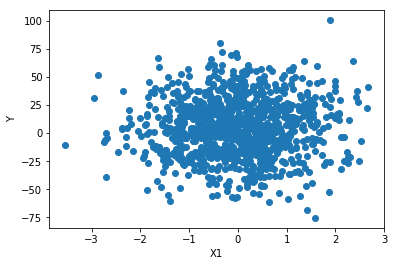

In [16]:
plt.figure()
plt.scatter(X1,Y)
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm_model1 = LinearRegression()

In [19]:
lm_model1.fit(np.expand_dims(X1[0:100], axis = 1),np.expand_dims(Y[0:100], axis = 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lm_model1.intercept_

array([4.71340805])

In [20]:
lm_model1.coef_

array([[1.91260232]])

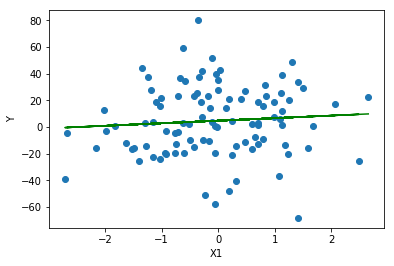

In [22]:
plt.scatter(X1[0:100],Y[0:100])
plt.plot(X1[0:100],lm_model1.intercept_ + lm_model1.coef_[0][0]*X1[0:100], color ='green')
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

In [23]:
lm_model2 = LinearRegression()

In [24]:
lm_model2.fit(np.expand_dims(X1[100:200], axis = 1),np.expand_dims(Y[100:200], axis = 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lm_model2.coef_

array([[4.35916406]])

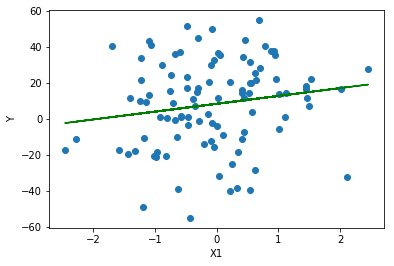

In [26]:
plt.scatter(X1[100:200],Y[100:200])
plt.plot(X1[100:200],lm_model2.intercept_ + lm_model2.coef_[0][0]*X1[100:200], color = 'green')
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

In [139]:
lm_model3 = LinearRegression()

In [140]:
lm_model3.fit(np.expand_dims(X1[200:300], axis = 1),np.expand_dims(Y[200:300], axis = 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
lm_model3.coef_[0][0]

3.647703591188909

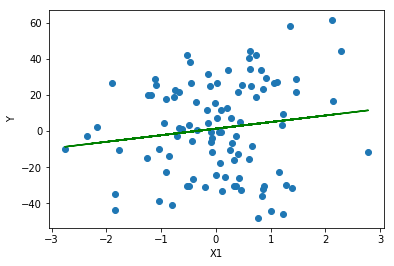

In [142]:
plt.scatter(X1[200:300],Y[200:300])
plt.plot(X1[200:300],lm_model3.intercept_ + lm_model3.coef_[0][0]*X1[200:300], color = 'green')
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

## For the same X1 there may be different value of Y when we sample at different instances. That is some unknown variable(the one that we dont have information of) is changing for the same value of X1 hence changing Y. So how do we deal with this.              

#### What we want to estimate
##### $$\hat{Y_{i}} = \hat{B_{o}} + \hat{B_{1}} * \hat{X1_{i}}$$

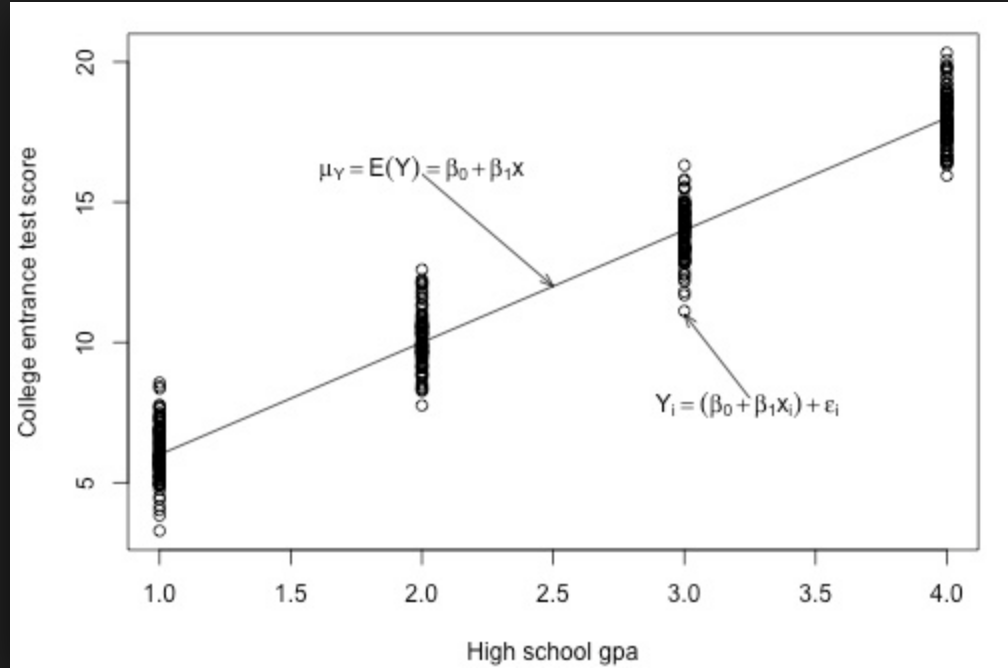

## Assumptions of Linear Regression.

## Distribution of Yi or Y for given Xi is assumed to be Normal.
### with mean as B_o + B_1*X1, and variance as Variance of $$e_{i}$$

## X is fixed, that is non-stochastic, no randomness.

##### $$Y_{i} = B_{o} + B_{1} * X1_{i} + e_{i}$$

##### $$ E(e_{i}) = 0 $$

$$E(Y/X_{i}) = B_{o} + B_{1}*X1_{i}$$

$$Var(Y/X_{i}) = Var(e_{i})$$

### Are assumptions realistic??, not always. But works out when there is large data.

## Population parameters are estimated from sample set. These are Maximum Likelihood Parameters.

### The assumption of loss itself derives itself from maximizing the the log-likelihood of the data in hand.

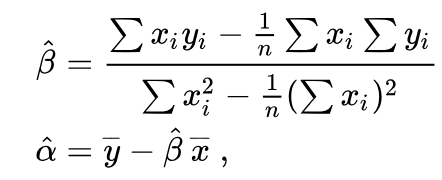

## We can derive that, $$B_o$$ , $$B_1$$. are normally distributed, with
 $$E(\hat{B_{1}}) = B_{1}$$
 $$Var(\hat{B_{1}}) = F(Sample Data)$$
 $$E(\hat{B_{o}}) = B_{o}$$
 $$Var(\hat{B_{o}}) = G(Sample Data)$$

## So now we have variance of B_o hat and B_1 hat

## We need to make assumption about mean or its expected value ie. B1 and B_o
## These values will be our hypothesis to be tested

In [27]:
from scipy import stats
import statsmodels.api as sm
X2 = sm.add_constant(X1)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.379
Date:                Wed, 26 Sep 2018   Prob (F-statistic):              0.240
Time:                        19:25:13   Log-Likelihood:                -4673.4
No. Observations:                1000   AIC:                             9351.
Df Residuals:                     998   BIC:                             9361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9701      0.820      6.060      0.0

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [155]:
import seaborn as sns

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

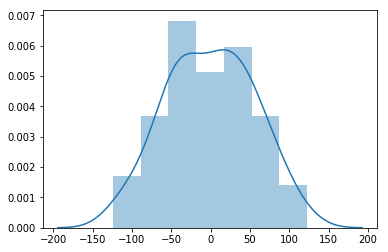

In [156]:
plt.figure()
k = 50*np.random.randn(100)
sns.distplot(k)
plt.show()

In [28]:
from scipy import stats
import statsmodels.api as sm
X2 = sm.add_constant(X1)
est = sm.OLS(Y - 4/5*e,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     36.34
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.34e-09
Time:                        19:28:12   Log-Likelihood:                -3064.0
No. Observations:                1000   AIC:                             6132.
Df Residuals:                     998   BIC:                             6142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9940      0.164     30.446      0.0

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


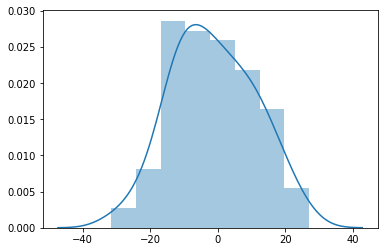

In [157]:
plt.figure()
k = 12*np.random.randn(100)
sns.distplot(k)
plt.show()

## Flavour of non-linearity.

In [2]:
import pandas as pd

In [3]:
df  = pd.read_csv('adv.csv')

In [5]:
import numpy as np #you know
import pandas as pd #For Data wrangling
import matplotlib.pyplot as plt #For basic plotting
import seaborn as sns #For beautiful plots
import plotly.graph_objs as go
import sklearn #For almost all Learning Algorithms( you wont be using it this way though)
from mpl_toolkits.mplot3d import Axes3D #For 3d plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #For interactive and great plots, but mostly presentations
init_notebook_mode(connected = True) #For not storing as .html

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
#Interactive 3d plot using Plotly
#Please do not waste time mugging up the interface and commands , you get used to it via practice.
x, y, z = df['Radio'] , df['TV'] , df['Sales']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    title = "The Graph",
    scene= go.Scene(
        xaxis=go.XAxis(title='Radio'),
        yaxis=go.YAxis(title='TV'),
        zaxis=go.ZAxis(title='Sales')
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)